# Multiclass Logistic Regression

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
import seaborn as sn

Xtrain shape:  (60000, 28, 28)
Ytrain shape:  (60000,)
Xtest shape:  (10000, 28, 28)
Ytest shape:  (10000,)


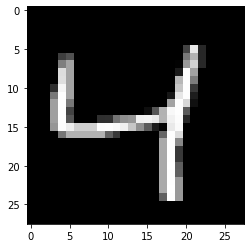

Xtrain after reshaping (60000, 784)
Xtest after reshaping (10000, 784)


In [2]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()
print("Xtrain shape: ", Xtrain.shape)
print("Ytrain shape: ", Ytrain.shape)
print("Xtest shape: ", Xtest.shape)
print("Ytest shape: ", Ytest.shape)
Xtrain = Xtrain/255
Xtest = Xtest/255
plt.imshow(Xtrain[2], cmap='gray')
plt.show()
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1]*Xtrain.shape[2]))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1]*Xtest.shape[2]))
print("Xtrain after reshaping", Xtrain.shape)
print("Xtest after reshaping", Xtest.shape)

## PCA

In [3]:
def prepare_PCA_data(Xtrain, Xtest):
    pca = PCA(n_components=0.97)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xtest_pca = pca.transform(Xtest)
    return Xtrain_pca, Xtest_pca

In [4]:
regularization = [0.0001, 0.001, 0.01, 0.1, 1]
accuracy1 = list()
for c in regularization:
    model_pca = LogisticRegression(max_iter=1000, multi_class='multinomial', C=c)
    Xtrain_pca, Xtest_pca = prepare_PCA_data(Xtrain, Xtest)
    model_pca.fit(Xtrain_pca, Ytrain)
    accu = model_pca.score(Xtest_pca, Ytest)
    print("Accuracy with regularization as %s is: "%c, accu)
    accuracy1.append(accu)

Accuracy with regularization as 0.0001 is:  0.8578
Accuracy with regularization as 0.001 is:  0.8998
Accuracy with regularization as 0.01 is:  0.9185
Accuracy with regularization as 0.1 is:  0.9235
Accuracy with regularization as 1 is:  0.9256


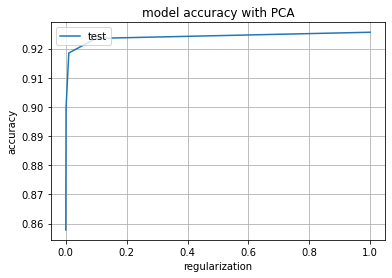

In [5]:
plt.plot(regularization, accuracy1)
plt.title('model accuracy with PCA')
plt.ylabel('accuracy')
plt.xlabel('regularization')
plt.legend(['test'], loc='upper left')
plt.grid()
plt.show()

Text(69.0, 0.5, 'Truth')

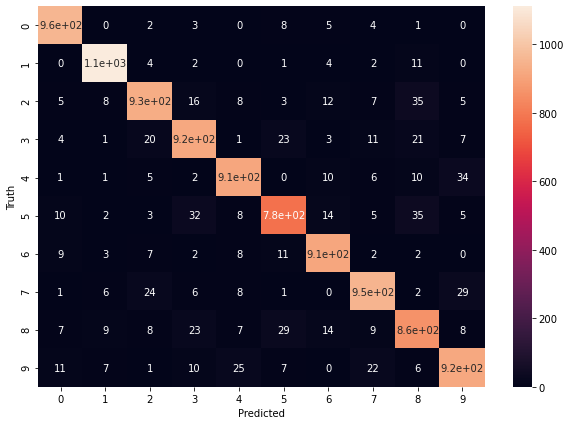

In [6]:
pred_pca = model_pca.predict(Xtest_pca)
cm = confusion_matrix(Ytest, pred_pca)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## LDA

In [7]:
def prepare_LDA_data(Xtrain, Ytrain, Xtest):
    lda = LDA(n_components=9)
    Xtrain_lda = lda.fit_transform(Xtrain, Ytrain)  
    Xtest_lda = lda.transform(Xtest)
    return Xtrain_lda, Xtest_lda

In [8]:
regularization = [0.0001, 0.001, 0.01, 0.1, 1]
accuracy2 = list()
for c in regularization:
    model_lda = LogisticRegression(max_iter=1000, multi_class='multinomial', C=c)
    Xtrain_lda, Xtest_lda = prepare_LDA_data(Xtrain, Ytrain, Xtest)
    model_lda.fit(Xtrain_lda, Ytrain)
    accu = model_lda.score(Xtest_lda, Ytest)
    print("Accuracy with regularization as %s is: "%c, accu)
    accuracy2.append(accu)

Accuracy with regularization as 0.0001 is:  0.8754
Accuracy with regularization as 0.001 is:  0.8826
Accuracy with regularization as 0.01 is:  0.8862
Accuracy with regularization as 0.1 is:  0.8867
Accuracy with regularization as 1 is:  0.8867


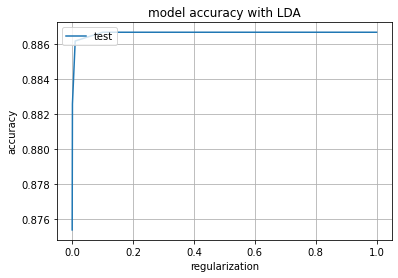

In [9]:
plt.plot(regularization, accuracy2)
plt.title('model accuracy with LDA')
plt.ylabel('accuracy')
plt.xlabel('regularization')
plt.legend(['test'], loc='upper left')
plt.grid()
plt.show()

Text(69.0, 0.5, 'Truth')

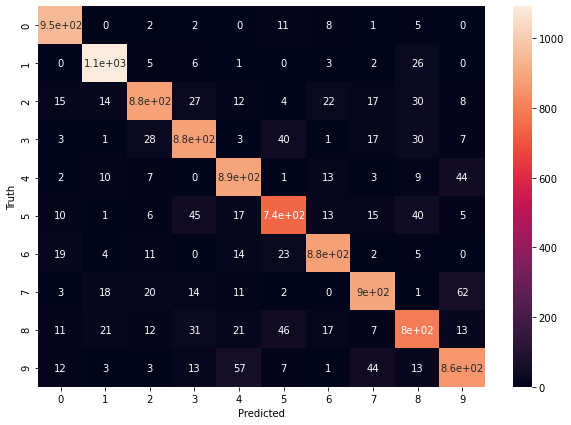

In [10]:
pred_lda = model_lda.predict(Xtest_lda)
cm = confusion_matrix(Ytest, pred_lda)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')